chapter04 다양한 분류 알고리즘    
04-1 로지스틱 회귀

In [39]:
# 데이터 준비
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [40]:
print(pd.unique(fish['Species'])) # 데이터 프레임 안의 특정 열(species)의 중복없는 고유값 출력

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [41]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']] # input 데이터 설정
fish_input.head() # 출력

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [42]:
fish_target = fish['Species'] # target 데이터 설정

In [43]:
# 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [44]:
# 데이터 전처리(표준화)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) # 평균, 표준편차 구함
train_scaled = ss.transform(train_input) # 훈련 데이터 변환
test_scaled = ss.transform(test_input) # 테스트 데이터 변환

In [45]:
# K-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3) # 최근접 이웃 개수 k=3로 지정
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


'다중 분류' = 타깃 데이터에 2개 이상의 클래스가 포함된 문제    
사이킷런에서는 문자열로 된 타깃값을 그대로 사용 가능    
[주의]  
타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 넘버링 됨    
따라서, pd.unique(fish['Species'])로 출력했던 순서와 달라짐

In [46]:
print(kn.classes_) # KNeighborsClassifier에서 정렬된 타깃값

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [47]:
print(kn.predict(test_scaled[:5])) # 테스트 세트의 처음 5개 샘플의 타깃값 예측

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [48]:
# 테스트 세트의 처음 5개 샘플의 확률 출력
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수점 네 번째 자리까지 표기

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [49]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target.iloc[indexes[0]])

52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


predict_proba의 결과와 동일

kneighbors() 매서드의 입력은 2차원 배열이어야 함  
- 이를 위해 넘파이 배열의 슬라이싱 연산자를 사용  
- 슬라이싱 연산자는 하나의 샘플만 선택해도 항상 2차원 배열이 만들어짐

로지스틱 회귀(분류모델)  
선형 회귀와 동일하게 선형 방정식을 학습
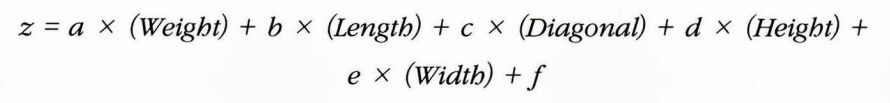

z값은 어떤 값도 가능  
> 이 값을 0과 1사이의 값으로 바꾸기 위해 '시그모이드 함수(로지스틱 함수)' 사용  
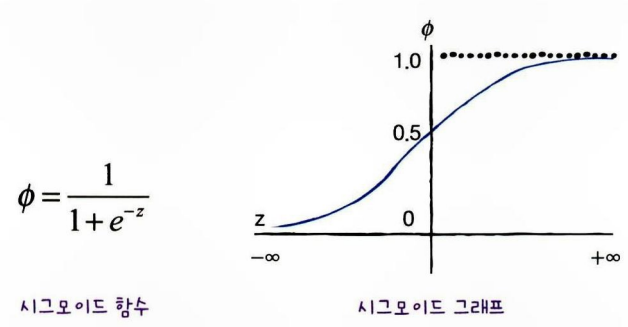

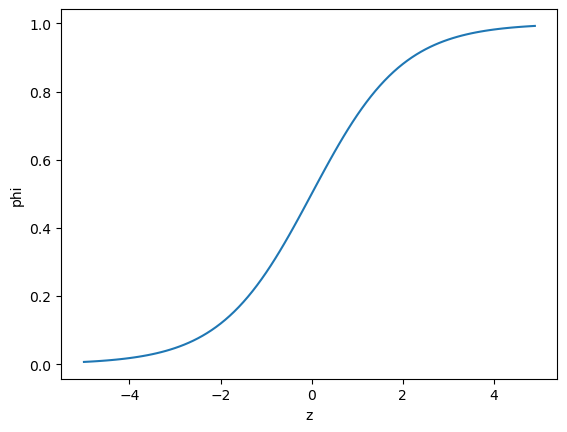

In [50]:
# 넘파이를 이용해 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1) # -5와 5 사이에 0.1 간격으로 배열 z를 만듦
phi = 1/(1+np.exp(-z)) # z 위치마다 시그모이드 함수 계산
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

[이진 분류에서 시그모이드 함수의 출력값]  
- 0.5보다 크면 양성 클래스  
- 0.5보다 작으면 음성 클래스로 판단  
- 0.5일 경우 라이브러리마다 다르나 사이킷런은 음성 클래스로 판단

In [51]:
# 불리언 인덱싱의 이해(True, False 값을 전달하여 행을 선택)
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [52]:

# 불리언 인덱싱 적용해 도미와 빙어 데이터 골라내기 
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 도미와 빙어 True로 만들기
train_bream_smelt = train_scaled[bream_smelt_indexes] # train_scaled에 불리언 인덱싱 적용
target_bream_smelt = train_target[bream_smelt_indexes] # test_scaled에 불리언 인덱싱 적용


In [53]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5])) # train_bream_smelt의 처음 5개 샘플 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [54]:
print(lr.predict_proba(train_bream_smelt[:5])) # 예측 확률 출력

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


첫 번째 열이 음성 클래스(0)에 대한 확률  
두 번째 열이 양성 클래스(1)에 대한 확률

In [55]:
print(lr.classes_) # classes_속성으로 음성 클래스, 양성 클래스 확인

['Bream' 'Smelt']


도미(Bream)가 음성, 빙어(Smelt)가 양성 클래스인 것 확인

In [56]:
print(lr.coef_, lr.intercept_) # 로지스틱 회귀 학습 계수 확인

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [57]:
decisions = lr.decision_function(train_bream_smelt[:5]) # Decision_function() 메서드로 z값 출력
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [58]:
from scipy.special import expit # 사이파이 라이브러리 import
print(expit(decisions)) # z값으로 시그모이드 함수를 이용해 확률을 얻음

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


[이진분류]  
predict_proba() : 음성 클래스와 양성 클래스에 대한 확률을 출력  
decision_function() : 양성 클래스에 대한 z값을 계산
Codf_ / intercept_ : 로지스틱 모델이 학습한 선형 방정식의 계수

로지스틱 회귀로 다중 분류 수행하기  
> 7개의 생선을 분류해 보면서 이진 분류와의 차이점 알아보기

LogisticRegression 클래스  
- 반복적인 알고리즘 사용 > max_iter 매개변수로 지정, 기본값 100
- 릿지 회귀와 같이 계수의 제곱을 규제(L2규제) > C 매개변수로 지정, 작을수록 규제가 커짐, 기본값 1 

In [59]:
# LogisticRegression 클래스로 다중 분류 모델 훈련
lr = LogisticRegression(C=20, max_iter=1000) # 규제 20으로 완화, 반복횟수 1000으로 늘림
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [60]:
print(lr.predict(test_scaled[:5])) # 테스트 세트의 처음 5개 샘플에 대한 예측 출력

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [61]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 예측 확률 출력, 소수점 3자리까지 표시

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [62]:
print(lr.classes_) # 클래스 정보 확인

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [64]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 5개의 특성을 사용하므로 coef_ 배열의 열은 5개  
- 행이 7개 = 다중 분류는 클래스마다 z 값을 하나씩 계산  
> 가장 높은 값을 출력하는 클래스가 예측 클래스가 됨

이진분류: 시그모이드 함수를 사용해 z를 0과 1 사이의 값으로 변환  
다중분류: 소프트맥스 함수를 사용하여 7개의 z 값을 확률로 변환

[소프트맥스 함수]
- 여러 개의 선형 방정식의 출력값을 0~1 사이의 확률로 압축하고 전체 합이 1이 되도록 만듦  
- 최댓값에 높은 확률을 할당하면서도 다른 값에도 작은 확률을 부여  
- 이를 위해 지수 함수를 사용해서 '정규화된 지수 함수'라고도 부름

In [ ]:
# decision_function() 매서드로 z값 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [67]:
# 소프트맥스 함수로 확률값 구하기
from scipy.special import softmax
proba = softmax(decision, axis=1) # axis 매개변수로 계산축으로 행을 지정
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산함  
axis = 0은 열을 계산  
axis = 1은 행을 계산

로지스틱 회귀는 분류 모델  
- 로지스틱 회귀 이진 분류: 하나의 선형 방정식 훈련, 시그모이드 함수로 출력값을 0~1 사이로 압축(양성 클래스에 대한 확률)    
- 로지스틱 회귀 다중 분류: 클래스 개수만큼 방정식 훈련, 소프트맥스 함수로 전체 클래스에 대한 합이 항상 1이 되도록 만듦